In [1]:
import sys
import sklearn
import matplotlib
import numpy as np


In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test)= mnist.load_data()


11501568/11490434 [==============================] - 3s 0us/step


In [4]:
print('Training Data : {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))

Training Data : (60000, 28, 28)
Training Labels: (60000,)


In [6]:
print('Testing data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Testing data: (10000, 28, 28)
Testing Labels: (10000,)


In [7]:
import matplotlib.pyplot as plt

#python magic function
%matplotlib inline



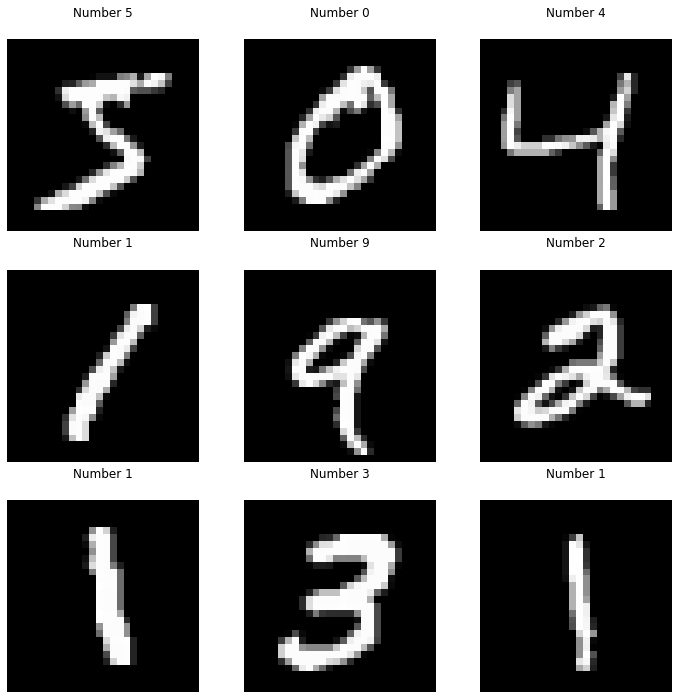

In [8]:
# create a figure with 3*3 subplots 

fig, axs=plt.subplots(3,3,figsize=(12,12))
plt.gray()

# loop through subplots and add mnist image
for i,ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
plt.show()

In [17]:
# convert each image to 1D array
X= x_train.reshape(len(x_train), -1)
Y=y_train

# normalise the data to 0-1
X=X.astype(float)/255.

print(X.shape)

(60000, 784)


In [20]:
from sklearn.cluster import MiniBatchKMeans

n_digits=len(np.unique(y_test))
print(n_digits)

# iniliatize kmeans model
kmeans= MiniBatchKMeans(n_clusters=n_digits)

# fit the model to the training data
kmeans.fit(X)

10


MiniBatchKMeans(n_clusters=10)

In [31]:
print(kmeans.labels_[:20]) # shows which clusters are training set data is assigned to. it does not mean that number.

[0 6 8 5 9 3 4 0 4 9 0 5 2 7 4 1 3 0 7 4]


In [62]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}

    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

In [63]:
# test the infer_cluster_labels() and infer_data_labels() functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print (predicted_labels[:20])
print (Y[:20])

[5 0 4 1 9 2 1 5 1 9 5 1 3 6 1 7 2 5 6 1]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [64]:
# optimising and evaluating the clustering algorithms
from sklearn import metrics

def calculate_metrics(estimator, data, labels):

    # Calculate and print metrics
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    print('Inertia: {}'.format(estimator.inertia_))
    print('Homogeneity: {}'.format(metrics.homogeneity_score(labels, estimator.labels_)))

In [69]:
clusters= [10, 16, 36, 64, 144, 256]

# test different no of clusters
for n_clusters in clusters:
    estimator=MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X)
    
    #print cluster matrix
    calculate_metrics(estimator, X, Y)
    
    # determine predicted labels
    cluster_labels= infer_cluster_labels(estimator, Y)
    predicted_Y= infer_data_labels(estimator.labels_, cluster_labels)
    
    # calculate and print accuracy
    print('Accuracy: {}\n'.format(metrics.accuracy_score(Y, predicted_Y)))

Number of Clusters: 10
Inertia: 2367598.377372087
Homogeneity: 0.4776859641956695
Accuracy: 0.5655833333333333

Number of Clusters: 16
Inertia: 2215018.7281240523
Homogeneity: 0.567196292488449
Accuracy: 0.6556333333333333

Number of Clusters: 36
Inertia: 1964249.645309383
Homogeneity: 0.694184244105707
Accuracy: 0.7761166666666667

Number of Clusters: 64
Inertia: 1817706.7281112876
Homogeneity: 0.7299525869183489
Accuracy: 0.78865

Number of Clusters: 144
Inertia: 1632081.904322392
Homogeneity: 0.8067784723594198
Accuracy: 0.8724666666666666

Number of Clusters: 256
Inertia: 1519505.9059772263
Homogeneity: 0.8444024715895616
Accuracy: 0.8983333333333333



In [70]:
# testing kmeans algorithm on testing dataset
# convert each image to 1 D array

X_test=x_test.reshape(len(x_test), -1)

# normalise the data to 0-1
X_test=X_test.astype(float)/255.

# initialise and fit kmeans algo on training data
kmeans= MiniBatchKMeans(n_clusters=256)
kmeans.fit(X)
cluster_labels= infer_cluster_labels(kmeans,Y)

# predict labels for testing data
test_clusters= kmeans.predict(X_test)
predicted_labels= infer_data_labels(test_clusters,cluster_labels)

# calculate and print accuracy
print('Testing Accuracy: {}'.format(metrics.accuracy_score(y_test, predicted_labels)))

Testing Accuracy: 0.9091


<ipython-input-71-d39a129a2009>:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


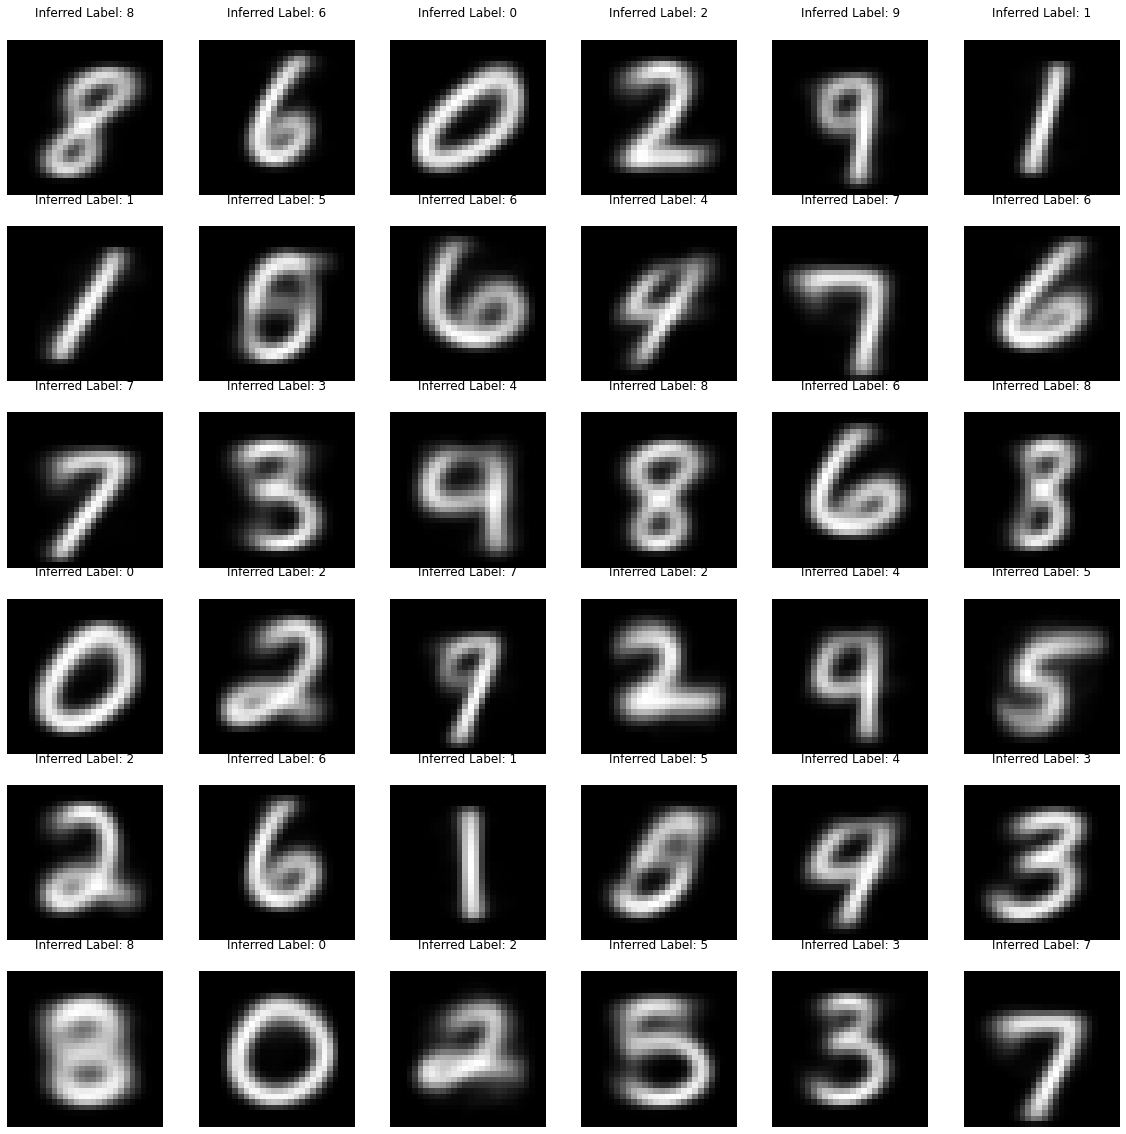

In [71]:
# Initialize and fit KMeans algorithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# record centroid values
centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()